In [9]:
import os, math, subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Load data and exploring statistics**

In [10]:
# data_path = os.path.join("./sample_data/Sample - Superstore.xls")
pdf_input = pd.read_excel("./sample_data/Sample - Superstore.xls")
pdf_input.info
# check rows, columns
total_records = pdf_input.shape[0]
total_cols = pdf_input.shape[1]

In [11]:
def create_sub_df(df_input):
  """
    create sub dataframe containe the fields which you need
  """
  years = []
  # months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
  months = []
  profit_rate = []

  for row in range(total_records):
    year = pdf_input['Order Date'][row].year
    month = pdf_input['Order Date'][row].month
    years.append(year)
    months.append(month)
    profit_rate.append(pdf_input['Profit'][row] / pdf_input['Sales'][row])
 
  # create a table containe the fields which you need
  my_data = {
      'Month':months,
      'Year':years,
      'State':pdf_input['State'],
      'Category':pdf_input['Category'],
      'Sub-Category':pdf_input['Sub-Category'],
      'Product':pdf_input['Product Name'],
      'Sales':pdf_input['Sales'],
      'Profit':pdf_input['Profit'], 
      'Profit Rate': profit_rate
      }
  df = pd.DataFrame(my_data)
  return df

def group_and_mean(df_input, field: str):
  data = {
      field: df_input[field],
      'Sales': df_input['Sales'],
      'Profit': df_input['Profit'],
      'Profit Rate': df_input['Profit Rate']
  }
  sub_df = pd.DataFrame(data)
  group_df = sub_df.groupby(field).mean().round(4)
  return group_df

df = create_sub_df(pdf_input)

         Sales   Profit  Profit Rate
Year                                
2014  242.9742  24.8590       0.1181
2015  223.8499  29.3143       0.1176
2016  235.4873  31.6178       0.1298
2017  221.3814  28.2123       0.1160


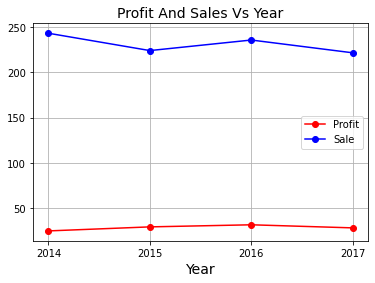

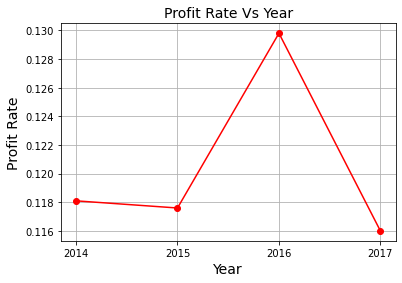

In [12]:
group_df_year = group_and_mean(df, 'Year')
print(group_df_year)

profit = list(group_df_year['Profit'])
sale = list(group_df_year['Sales'])
profit_rate = list(group_df_year['Profit Rate'])
labels_1 = group_df_year.index

# Plot line chart visualize Profit And Sales Over Years
plt.plot(labels_1, profit, color='red', marker='o', label='Profit')
plt.plot(labels_1, sale, color='blue', marker='o', label='Sale')
plt.title('Profit And Sales Vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(True)
plt.xticks(labels_1)
plt.legend()
plt.show()

# Plot line chart visualize Profit Rate Over Years
plt.plot(labels_1, profit_rate, color='red', marker='o')
plt.title('Profit Rate Vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Profit Rate', fontsize=14)
plt.grid(True)
plt.xticks(labels_1)
plt.show()

**1. How have profit and sales changed over the years?**
- Sale thay đổi không đồng đều theo từng năm: tăng từ giai đoạn 2015-2016 nhưng lại giảm từ 2014-2015 và 2016-2017
- Profit tăngg rất chậm từ 2014-2016 và có xu hướng giảm trong giai đoạn 2016-2017
 

**2. How do profit Rate (Profit/Sales) over years?**
- Profit rate tăng mạnh từ 2015-2016 nhưng sau đó lại giảm mạnh tù 2016-2017

In [13]:
def cluster_month(pdf_input, year):
  """
    cluster the data based on the months in year
  """
  m_sales = []
  m_profit = []
  m_profit_rate = []
  month_year = []

  for row in range(total_records):
    check_year = pdf_input['Year'][row] == year
    if check_year:
      month_year.append(pdf_input['Month'][row])
      m_sales.append(pdf_input['Sales'][row])
      m_profit.append(pdf_input['Profit'][row])
      m_profit_rate.append(pdf_input['Profit Rate'][row])
 
  # create a table containe month, sales, profit, profit_rate
  my_data = {'Month':month_year, 
             'Sales':m_sales, 
             'Profit':m_profit,
             'Profit Rate': m_profit_rate
             }
  df = pd.DataFrame(my_data)
  group_df_month = group_and_mean(df, 'Month')
  return group_df_month

          Sales   Profit  Profit Rate
Month                                
1      283.6863  46.0673       0.0791
2      189.7302  15.0829       0.0624
3      247.3628  61.9827       0.1516
4      179.9090   4.5975       0.0522
5      182.8971  26.2090       0.1006
6      216.2519  33.5646       0.0703
7      200.2850  30.7638       0.1541
8      289.5454  41.4723       0.1583
9      191.4306  23.9467       0.1489
10     260.9964  31.1251       0.0877
11     258.0563  21.1113       0.1121
12     181.4487  18.3622       0.1334


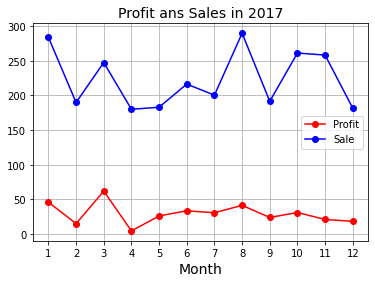

In [14]:
df_month = cluster_month(df, 2017)
print(df_month)
profit_month = list(df_month['Profit'])
sale_month = list(df_month['Sales'])
labels_2 = df_month.index

# Plot line chart visualize Profit And Sales in 2017
plt.plot(labels_2, profit_month, color='red', marker='o', label='Profit')
plt.plot(labels_2, sale_month, color='blue', marker='o', label='Sale')
plt.title('Profit ans Sales in 2017', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.grid(True)
plt.xticks(labels_2)
plt.legend()
plt.show()

**3. How do profit and sales change over months in 2017?**
- Lượng sale tăng giảm liên tục và có xu hướng tăng mạnh vào các giai đoạn tháng 7-tháng 8 và tháng 12-tháng 1
- Profit tăng rất chậm và có xu hướng giảm dần

In [15]:
## Find state has the highest return rate
df_state = group_and_mean(df, 'State')
print(df_state)
highest_rate_1 = df_state['Profit Rate'].max()
state_highest_rate = df_state['Profit Rate'].idxmax()
print("State has the highest return rates is: " + state_highest_rate + " with " + str(highest_rate_1))

                          Sales    Profit  Profit Rate
State                                                 
Alabama                319.8466   94.8660       0.3315
Arizona                157.5089  -15.3032      -0.0664
Arkansas               194.6355   66.8115       0.3795
California             228.7295   38.1716       0.2783
Colorado               176.4182  -35.8674      -0.1238
Connecticut            163.2239   42.8231       0.3364
Delaware               285.9486  103.9310       0.3501
District of Columbia   286.5020  105.9589       0.4220
Florida                233.6128   -8.8755      -0.0180
Georgia                266.8252   88.3155       0.3452
Idaho                  208.6898   39.3678       0.2775
Illinois               162.9392  -25.6258      -0.3917
Indiana                359.4319  123.3754       0.3479
Iowa                   152.6587   39.4604       0.3993
Kansas                 121.4296   34.8518       0.3338
Kentucky               263.2500   80.5734       0.3331
Louisiana 

**4. Which states have the highest return rates?**
- Vùng có profit rate cao nhất là District of Columbia với 0.422

In [16]:
## Find category has the highest return rate
df_category = group_and_mean(df, 'Category')
highest_rate_2 = df_category['Profit Rate'].max()
category_highest_rate = df_category['Profit Rate'].idxmax()
print("Category has the highest return rates is: " + category_highest_rate + " with " + str(highest_rate_2))

Category has the highest return rates is: Technology with 0.1561


**5. Which categories have the highest return rates?**
- Danh mục có profit rate cao nhất là Technology với 0.1561

In [17]:
def count_order_by_month(df_input):
  """
    Count the orders by the months of year
  """
  data = {
      'Month': df_input['Month'],
      'Order Numbers': 1 
  }
  new_df = pd.DataFrame(data)
  new_df = new_df.groupby('Month').sum()
  return new_df

In [18]:
## Find the month of year has the most orders
df_month = count_order_by_month(df)
print(df_month)
most_orders = df_month['Order Numbers'].max()
month_most_orders = df_month['Order Numbers'].idxmax()
print("The month has the most orders is: " + str(month_most_orders) + " with " + str(most_orders))

       Order Numbers
Month               
1                381
2                300
3                696
4                668
5                735
6                717
7                710
8                706
9               1383
10               819
11              1471
12              1408
The month has the most orders is: 11 with 1471


**6. Which month of the year has the most orders?**
- Tháng 11 có nhiều đơn đặt hàng nhất trong năm với 1471 đơn

In [21]:
## Find 10 best-selling products
df_products = group_and_mean(df, 'Product')
sorted_df = df_products.sort_values(by=['Sales'], ascending=False)
print(sorted_df[:10])

                                                         Sales  ...  Profit Rate
Product                                                         ...             
Cisco TelePresence System EX90 Videoconferencin...  22638.4800  ...      -0.0800
Canon imageCLASS 2200 Advanced Copier               12319.9648  ...       0.3847
Cubify CubeX 3D Printer Triple Head Print            7999.9800  ...      -0.4800
3D Systems Cube Printer, 2nd Generation, Magenta     7149.9450  ...       0.2600
HP Designjet T520 Inkjet Large Format Printer -...   6124.9650  ...       0.0933
High Speed Automatic Electric Letter Opener          5676.7707  ...      -0.0400
Ibico EPK-21 Electric Binding System                 5291.9720  ...      -0.2325
Lexmark MX611dhe Monochrome Laser Printer            4207.4752  ...      -0.3611
Canon imageCLASS MF7460 Monochrome Digital Lase...   3991.9800  ...       0.5000
Okidata MB760 Printer                                3917.2000  ...       0.1125

[10 rows x 3 columns]


**7. Top 10 best-selling products?**


1. Cisco TelePresence System EX90 Videoconferencing Unit
2. Canon imageCLASS 2200 Advanced Copier
3. Cubify CubeX 3D Printer Triple Head Print
4. 3D Systems Cube Printer, 2nd Generation, Magenta
5. HP Designjet T520 Inkjet Large Format Printer - 24" Color
6. High Speed Automatic Electric Letter Opener
7. Ibico EPK-21 Electric Binding System
8. Lexmark MX611dhe Monochrome Laser Printer
9. Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier
10. Okidata MB760 Printer



In [20]:
## 
data_sub_category = {
    'Category': df['Category'],
    'Sub-Category': df['Sub-Category']
}
df_sub_category = pd.DataFrame(data_sub_category)
df_sub_category = df_sub_category.groupby('Category')['Sub-Category'].apply(list)
for row in range(len(df_sub_category)):
  df_sub_category[row] = list(dict.fromkeys(df_sub_category[row]))
print(df_sub_category)
print("Sub-category are usually sold together: \n")
for row in df_sub_category:
  string = "-"
  for index in range(len(row)):
    string = string + row[index] + ", " 
  print(string)

Category
Furniture                   [Bookcases, Chairs, Tables, Furnishings]
Office Supplies    [Labels, Storage, Art, Binders, Appliances, Pa...
Technology                  [Phones, Accessories, Machines, Copiers]
Name: Sub-Category, dtype: object
Sub-category are usually sold together: 

-Bookcases, Chairs, Tables, Furnishings, 
-Labels, Storage, Art, Binders, Appliances, Paper, Envelopes, Fasteners, Supplies, 
-Phones, Accessories, Machines, Copiers, 


**8. Which sub-category are usually sold together?**
- Các danh mục con luôn được bán cùng nhau là:


1. Bookcases, Chairs, Tables, Furnishings
2. Labels, Storage, Art, Binders, Appliances, Paper, Envelopes, Fasteners, Supplies
3. Phones, Accessories, Machines, Copiers



**Advanced:**


1. Vì sao sale tăng mạnh, nhưng profit lại tăng rất chậm?


> Sale tăng mạnh nhưng profit tăng rất chậm do có nhiều discount với tỉ lệ rất cao (lên đến 0.8)


2. Vì sao profit tăng nhưng profit rate lại giảm?


> Profit rate = profit / sale
- Mặc dù profit rate tăng nhưng có những thời điểm lượng sale lại tăng lớn hơn nhiều so với profit nên vì thế mà tại các thời điểm đó mặc dù profit tăng nhưng sale thì lại giảm

3. Để nâng cao doanh thu bán hàng cần:
* Căn chỉnh tỉ lệ discount hợp lí
* Có chiến dịch marketing hợp lí
* Cần tăng số lượng hàng bán chạy vào các thời điểm bán được nhiều nhất trong năm



